In [1]:
# import the required libraries and supress the warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read the file and understand the data
lead_df=pd.read_csv(r'C:\Users\hp\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning
First we can remove all the variables irrelevant in deciding the leads conversion and also treat the null/missing values if any.

In [5]:
# Removing 'Country' and 'City' since the courses offered are completely online
lead_df=lead_df.drop(labels=['Country','City'],axis=1)

In [6]:
# Removing the various sources of ads since single variable would suffice which is there
lead_df=lead_df.drop(labels=['Prospect ID','Search','Magazine','Newspaper Article','X Education Forums',
                             'Newspaper','Digital Advertisement'],axis=1)
lead_df.shape

(9240, 28)

In [7]:
# Deleting some more absurd variables
lead_df=lead_df.drop(labels=['Do Not Call','Do Not Email','What matters most to you in choosing a course',
                    'Update me on Supply Chain Content','Get updates on DM Content','Asymmetrique Activity Index',
                    'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',
                    'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity'],axis=1)
lead_df.shape

(9240, 16)

In [8]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Lead Profile
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,No,No,Interested in other courses,Low in Relevance,Select
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,No,No,Ringing,NaN,Select
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,No,No,Will revert after reading the email,Might be,Potential Lead
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,No,No,Ringing,Not Sure,Select
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,No,No,Will revert after reading the email,Might be,Select


Still there are a few entries depicting 'Select', implying nothing has been selected as a response. So they can be considered as missing observations which can be removed.

In [9]:
lead_df=lead_df[~(lead_df=='Select')]

In [10]:
round(100*(lead_df.isnull().sum()/len(lead_df)))

Lead Number                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Specialization                            37.0
How did you hear about X Education        78.0
What is your current occupation           29.0
Through Recommendations                    0.0
Receive More Updates About Our Courses     0.0
Tags                                      36.0
Lead Quality                              52.0
Lead Profile                              74.0
dtype: float64

In [11]:
# Removing 'Lead Profile', 'Specialization','What is your current occupation','How did you hear about X Education'
lead_df=lead_df.drop(labels=['Lead Profile','Specialization','What is your current occupation',
                             'How did you hear about X Education'],axis=1)
lead_df.shape

(9240, 12)

In [12]:
# Rechecking null values
round(100*(lead_df.isnull().sum()/len(lead_df)))

Lead Number                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Through Recommendations                    0.0
Receive More Updates About Our Courses     0.0
Tags                                      36.0
Lead Quality                              52.0
dtype: float64

- Here 'Lead Quality' has more than 50% and 'Tags' has 36% of the null values and it is usually better from the analysis point of view to get rid of such variables altogether, lest compromise with quality of work, but both of them are vital to our study, keeping the analysis objective in mind. So, in this case we remove the null values instead of the columns.

In [13]:
lead_df=lead_df.dropna(axis=0)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,No,Interested in other courses,Low in Relevance
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,No,No,Will revert after reading the email,Might be
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,No,Ringing,Not Sure
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,No,Will revert after reading the email,Might be
6,660673,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,No,No,Will revert after reading the email,Low in Relevance


Now we can carry on with the next step of preparing dummies for categorical variables.

# Data Preparation

In [14]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,No,Interested in other courses,Low in Relevance
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,No,No,Will revert after reading the email,Might be
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,No,Ringing,Not Sure
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,No,Will revert after reading the email,Might be
6,660673,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,No,No,Will revert after reading the email,Low in Relevance


In [15]:
# Converting 'Yes/No' into 1/0
varlist=['Through Recommendations','Receive More Updates About Our Courses']

def binary_map(x):
    return x.map({'Yes':1,'No':0})
lead_df[varlist]=lead_df[varlist].apply(binary_map)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0,0,Interested in other courses,Low in Relevance
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,0,0,Will revert after reading the email,Might be
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0,0,Ringing,Not Sure
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0,0,Will revert after reading the email,Might be
6,660673,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,0,0,Will revert after reading the email,Low in Relevance


In [16]:
# Creating dummies for the remaining categorical variables, dropping the first one and removing the redundant variables
lead_dummy=pd.get_dummies(lead_df[['Lead Origin','Lead Source','Tags','Last Activity','Lead Quality']])

lead_df=pd.concat([lead_df,lead_dummy],axis=1)

lead_df=lead_df.drop(['Lead Origin','Lead Source','Tags','Last Activity','Lead Quality'],1)
lead_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,660737,0,0.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,660727,1,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,1.0,305,1.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,660681,1,2.0,1428,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,660673,1,2.0,1640,2.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4327 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Lead Number                                             4327 non-null   int64  
 1   Converted                                               4327 non-null   int64  
 2   TotalVisits                                             4327 non-null   float64
 3   Total Time Spent on Website                             4327 non-null   int64  
 4   Page Views Per Visit                                    4327 non-null   float64
 5   Through Recommendations                                 4327 non-null   int64  
 6   Receive More Updates About Our Courses                  4327 non-null   int64  
 7   Lead Origin_API                                         4327 non-null   uint8  
 8   Lead Origin_Landing Page Submission   

In [18]:
# Checking for Outliers
lead_df.describe(percentiles=[.1,.25,.5,.75,.9,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
count,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.0,4327.000000,4327.000000,4327.000000,...,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000
mean,616154.415068,0.562052,3.808643,595.673908,2.610344,0.001387,0.0,0.271089,0.627687,0.098452,...,0.391264,0.015253,0.006009,0.000462,0.000231,0.136353,0.128033,0.348740,0.247978,0.138895
std,23282.170927,0.496192,5.304016,579.215127,2.081011,0.037216,0.0,0.444573,0.483477,0.297959,...,0.488090,0.122572,0.077292,0.021497,0.015202,0.343203,0.334165,0.476627,0.431889,0.345877
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,585850.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,595765.000000,0.000000,2.000000,67.000000,1.330000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,613343.000000,1.000000,3.000000,353.000000,2.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,636418.500000,1.000000,5.000000,1104.500000,4.000000,0.000000,0.0,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
90%,649407.600000,1.000000,8.000000,1478.000000,5.000000,0.000000,0.0,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,655163.200000,1.000000,10.000000,1626.400000,6.000000,0.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# inspecting any null value
lead_df.isnull().sum()

Lead Number                       0
Converted                         0
TotalVisits                       0
Total Time Spent on Website       0
Page Views Per Visit              0
                                 ..
Lead Quality_High in Relevance    0
Lead Quality_Low in Relevance     0
Lead Quality_Might be             0
Lead Quality_Not Sure             0
Lead Quality_Worst                0
Length: 71, dtype: int64

So there are no null values left. Now we casn carry on with the train-test split for modelling

### Train-Test Split

In [20]:
# Creaating a new variable 'X' and putting in it the feature variables
X=lead_df.drop(['Lead Number','Converted'],1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0.0,0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2.0,1640,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# Creating the response variable 'y'
y=lead_df[['Converted']]
y.head()

,Converted
0,0
2,1
3,0
4,1
6,1


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [23]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=StandardScaler().fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3084,0.928731,-0.623910,2.086393,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8566,0.077152,0.149678,-0.291223,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5756,0.361012,-0.703519,-0.053462,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6616,-0.206708,1.627629,0.184300,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2094,0.928731,0.703477,-0.410104,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [24]:
# Percentage of converted
converted=100*(sum(lead_df.Converted)/len(lead_df))
converted

56.205223018257456

- So, the conversion rate of the leads to the paying customers is 56%.

# Modelling

In [25]:
# Logistic Regression Model
lr=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     2967
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Mar 2021   Deviance:                          nan
Time:                        22:50:23   Pearson chi2:                 1.16e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.011e+15   8.76e+06   1.15e+08      0.000    1.01e+15    1.01e+15
TotalVisits                                             1.124e+14   1.73e+06   6.51e+07      0.000    1.12e+14    1.12e+14
Total Time Spent on Website                             2.507e+14   1.53e+06   1.64e+08      0.000    2.51e+14    2.51e+14
Page Views Per Visit                                   -9.506e+13   1.86e+06  -5.12e+07      0.000   -9.51e+13   -9.51e+13
Through Recommendations                                 5.858e+14   3.03e+07   1.93e+07      0.000    5.86e+14    5.86e+14
Receive More Updates About Our Courses                     4.7161   1.52e-07   3.11e+07      0.000       4.716       4.716
Lead Origin_API                                        -1.621e+15   2.19e+07  -7.41e+07      0.000   -1.62e+15   -1.62e+15
Lead Origin_Landing Page Submission                     -1.46e+15   2.19e+07  -6.68e+07      0.000   -1.46e+15   -1.46e+15
Lead Origin_Lead Add Form                               4.238e+15   4.62e+07   9.17e+07      0.000    4.24e+15    4.24e+15
Lead Origin_Lead Import                                -1.462e+14   1.12e+07  -1.31e+07      0.000   -1.46e+14   -1.46e+14
Lead Source_Click2call                                 -2.601e+15    6.8e+07  -3.83e+07      0.000    -2.6e+15    -2.6e+15
Lead Source_Direct Traffic                              9.402e+14   2.18e+07   4.32e+07      0.000     9.4e+14     9.4e+14
Lead Source_Facebook                                   -1.462e+14   1.12e+07  -1.31e+07      0.000   -1.46e+14   -1.46e+14
Lead Source_Google                                      1.063e+15   2.17e+07   4.91e+07      0.000    1.06e+15    1.06e+15
Lead Source_Live Chat                                     44.8790   4.02e-07   1.12e+08      0.000      44.879      44.879
Lead Source_Olark Chat                                  1.298e+15   2.21e+07   5.86e+07      0.000     1.3e+15     1.3e+15
Lead Source_Organic Search                              1.167e+15   2.18e+07   5.35e+07      0.000    1.17e+15    1.17e+15
Lead Source_Press_Release                              -1.365e+15   6.52e+07  -2.09e+07      0.000   -1.37e+15   -1.37e+15
Lead Source_Reference                                  -4.438e+15      5e+07  -8.88e+07      0.000   -4.44e+15   -4.44e+15
Lead Source_Referral Sites                                1.3e+15   2.43e+07   5.36e+07      0.000     1.3e+15     1.3e+15
Lead Source_Social Media                                7.512e+15   6.52e+07   1.15e+08      0.000    7.51e+15    7.51e+15
Lead Source_WeLearn                                      -18.3396   2.71e-07  -6.77e+07      0.000     -18.340     -18.340
Lead Sou

### Feature Selection using RFE

In [26]:
logreg=LogisticRegression()

In [27]:
# Using RFE for selecting 15 variables
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False,  True])

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 19),
 ('Through Recommendations', False, 26),
 ('Receive More Updates About Our Courses', False, 53),
 ('Lead Origin_API', False, 20),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', False, 3),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Source_Click2call', False, 24),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Live Chat', False, 55),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 41),
 ('Lead Source_WeLearn', False, 54),
 ('Lead Source_Welingak Website', False, 27),
 ('Lead Source_testone', False, 50),
 ('Tags_Already a student', True, 1),
 ('Tags_Busy', Tru

In [29]:
cols=X_train.columns[rfe.support_]
cols

Index(['Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Activity_SMS Sent', 'Lead Quality_High in Relevance',
       'Lead Quality_Worst'],
      dtype='object')

In [30]:
# Assessing the model with statsmodels
X_train_sm=sm.add_constant(X_train[cols])
lr1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1=lr1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     3012
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -373.14
Date:                Sun, 07 Mar 2021   Deviance:                       746.28
Time:                        22:50:26   Pearson chi2:                 2.96e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3667      0.300     -7.879      0.000      -2.955      -1.778
Tags_Already a student                      -1.6239      0.791     -2.053      0.040      -3.174      -0.073
Tags_Busy                                    1.9802      0.349      5.680      0.000       1.297       2.663
Tags_Closed by Horizzon                      6.8576      1.048      6.542      0.000       4.803       8.912
Tags_Interested in Next batch               25.4885   6.55e+04      0.000      1.000   -1.28e+05    1.28e+05
Tags_Interested in other courses            -1.0409      0.502     -2.073      0.038      -2.025      -0.057
Tags_Lost to EINS                            5.7020      0.807      7.065      0.000       4.120       7.284
Tags_Not doing further education           -21.4442   1.38e+04     -0.002      0.999   -2.71e+04    2.71e+04
Tags_Ringing                                -1.9444      0.399     -4.877      0.000      -2.726      -1.163
Tags_Will revert after reading the email     5.5144      0.337     16.369      0.000       4.854       6.175
Tags_invalid number                         -1.6458      1.069     -1.539      0.124      -3.742       0.450
Tags_switched off                           -2.6074      0.773     -3.372      0.001      -4.123      -1.092
Tags_wrong number given                    -22.8335   2.33e+04     -0.001      0.999   -4.57e+04    4.57e+04
Last Activity_SMS Sent                       1.4443      0.233      6.200      0.000       0.988       1.901
Lead Quality_High in Relevance               1.1768      0.434      2.710      0.007       0.326       2.028
Lead Quality_Worst                          -1.6409      0.613     -2.676      0.007      -2.843      -0.439
============================================================================================================
"""

## Manual Fine Tuning using p-values and VIF score
Now having selected the top 15 feature variables using the Recursive Feature Elimination method, now we compare the p-values and VIF score to further remove the redundant variables.

In [31]:
# Removing the variable with high p-value and rebuilding the model
X_train_rfe=X_train[cols].drop('Tags_Interested in Next batch',1)
X_train_sm=sm.add_constant(X_train_rfe)
lr2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res2=lr2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     3013
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -377.81
Date:                Sun, 07 Mar 2021   Deviance:                       755.62
Time:                        22:50:26   Pearson chi2:                 3.00e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2024      0.282     -7.821      0.000      -2.754      -1.650
Tags_Already a student                      -1.7603      0.782     -2.250      0.024      -3.294      -0.227
Tags_Busy                                    1.7682      0.331      5.339      0.000       1.119       2.417
Tags_Closed by Horizzon                      6.7205      1.045      6.432      0.000       4.673       8.768
Tags_Interested in other courses            -1.2077      0.493     -2.452      0.014      -2.173      -0.242
Tags_Lost to EINS                            5.5688      0.805      6.914      0.000       3.990       7.147
Tags_Not doing further education           -21.5916   1.38e+04     -0.002      0.999    -2.7e+04    2.69e+04
Tags_Ringing                                -2.1698      0.383     -5.664      0.000      -2.921      -1.419
Tags_Will revert after reading the email     5.3390      0.321     16.631      0.000       4.710       5.968
Tags_invalid number                         -1.8643      1.065     -1.751      0.080      -3.951       0.223
Tags_switched off                           -2.8358      0.765     -3.705      0.000      -4.336      -1.336
Tags_wrong number given                    -23.0348   2.32e+04     -0.001      0.999   -4.56e+04    4.55e+04
Last Activity_SMS Sent                       1.5246      0.232      6.584      0.000       1.071       1.978
Lead Quality_High in Relevance               1.1057      0.427      2.592      0.010       0.269       1.942
Lead Quality_Worst                          -1.7320      0.605     -2.864      0.004      -2.917      -0.547
============================================================================================================
"""

In [32]:
# Now we check the VIFs values for the feature variables
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
2,Tags_Closed by Horizzon,1.30
5,Tags_Not doing further education,1.22
3,Tags_Interested in other courses,1.13
1,Tags_Busy,1.08
8,Tags_invalid number,1.05
9,Tags_switched off,1.05
4,Tags_Lost to EINS,1.02
10,Tags_wrong number given,1.02
13,Lead Quality_Worst,0.90
12,Lead Quality_High in Relevance,0.58


- All the VIFs are low, implying no multicollinearity is present in the data

In [33]:
# Rebuilding the model after removing more high p-valued variables
X_train_rfe=X_train_rfe.drop('Tags_Not doing further education',1)
X_train_sm=sm.add_constant(X_train_rfe)
lr3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res3=lr3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     3014
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -381.59
Date:                Sun, 07 Mar 2021   Deviance:                       763.18
Time:                        22:50:27   Pearson chi2:                 3.19e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4226      0.275     -8.794      0.000      -2.963      -1.883
Tags_Already a student                      -1.4772      0.772     -1.913      0.056      -2.991       0.037
Tags_Busy                                    1.9629      0.328      5.981      0.000       1.320       2.606
Tags_Closed by Horizzon                      6.9127      1.043      6.625      0.000       4.868       8.958
Tags_Interested in other courses            -0.9958      0.491     -2.029      0.042      -1.958      -0.034
Tags_Lost to EINS                            5.8653      0.810      7.245      0.000       4.278       7.452
Tags_Ringing                                -1.9844      0.381     -5.208      0.000      -2.731      -1.238
Tags_Will revert after reading the email     5.5434      0.317     17.474      0.000       4.922       6.165
Tags_invalid number                         -1.6547      1.065     -1.554      0.120      -3.742       0.432
Tags_switched off                           -2.6494      0.764     -3.466      0.001      -4.148      -1.151
Tags_wrong number given                    -21.8311    1.4e+04     -0.002      0.999   -2.75e+04    2.75e+04
Last Activity_SMS Sent                       1.5675      0.232      6.758      0.000       1.113       2.022
Lead Quality_High in Relevance               1.1810      0.432      2.731      0.006       0.333       2.029
Lead Quality_Worst                          -1.9290      0.589     -3.275      0.001      -3.083      -0.774
============================================================================================================
"""

In [34]:
# Rebuilding the model after removing more high p-valued variables
X_train_rfe=X_train_rfe.drop('Tags_wrong number given',1)
X_train_sm=sm.add_constant(X_train_rfe)
lr4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res4=lr4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     3015
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -386.00
Date:                Sun, 07 Mar 2021   Deviance:                       772.01
Time:                        22:50:27   Pearson chi2:                 3.16e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6305      0.275     -9.560      0.000      -3.170      -2.091
Tags_Already a student                      -1.2769      0.773     -1.651      0.099      -2.793       0.239
Tags_Busy                                    2.1980      0.323      6.803      0.000       1.565       2.831
Tags_Closed by Horizzon                      7.1164      1.042      6.826      0.000       5.073       9.160
Tags_Interested in other courses            -0.7805      0.489     -1.596      0.110      -1.739       0.178
Tags_Lost to EINS                            6.0584      0.808      7.495      0.000       4.474       7.643
Tags_Ringing                                -1.7408      0.375     -4.639      0.000      -2.476      -1.005
Tags_Will revert after reading the email     5.7598      0.315     18.288      0.000       5.143       6.377
Tags_invalid number                         -1.4131      1.062     -1.330      0.183      -3.495       0.669
Tags_switched off                           -2.4044      0.761     -3.158      0.002      -3.897      -0.912
Last Activity_SMS Sent                       1.5217      0.229      6.639      0.000       1.073       1.971
Lead Quality_High in Relevance               1.1937      0.428      2.789      0.005       0.355       2.033
Lead Quality_Worst                          -1.8874      0.590     -3.197      0.001      -3.045      -0.730
============================================================================================================
"""

In [35]:
# Rebuilding the model after removing more high p-valued variables
X_train_rfe=X_train_rfe.drop('Tags_invalid number',1)
X_train_sm=sm.add_constant(X_train_rfe)
lr5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res5=lr5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     3016
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -387.27
Date:                Sun, 07 Mar 2021   Deviance:                       774.55
Time:                        22:50:27   Pearson chi2:                 3.13e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7381      0.273    -10.048      0.000      -3.272      -2.204
Tags_Already a student                      -1.1538      0.771     -1.496      0.135      -2.665       0.358
Tags_Busy                                    2.3279      0.316      7.358      0.000       1.708       2.948
Tags_Closed by Horizzon                      7.2086      1.042      6.919      0.000       5.167       9.251
Tags_Interested in other courses            -0.6682      0.487     -1.372      0.170      -1.623       0.286
Tags_Lost to EINS                            6.1816      0.809      7.646      0.000       4.597       7.766
Tags_Ringing                                -1.6046      0.368     -4.357      0.000      -2.326      -0.883
Tags_Will revert after reading the email     5.8717      0.311     18.858      0.000       5.261       6.482
Tags_switched off                           -2.2662      0.758     -2.990      0.003      -3.752      -0.781
Last Activity_SMS Sent                       1.4841      0.227      6.534      0.000       1.039       1.929
Lead Quality_High in Relevance               1.2386      0.432      2.870      0.004       0.393       2.084
Lead Quality_Worst                          -1.9200      0.588     -3.267      0.001      -3.072      -0.768
============================================================================================================
"""

In [36]:
# Rebuilding the model after removing more high p-valued variables
X_train_rfe=X_train_rfe.drop('Tags_Interested in other courses',1)
X_train_sm=sm.add_constant(X_train_rfe)
lr6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res6=lr6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     3017
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -388.31
Date:                Sun, 07 Mar 2021   Deviance:                       776.61
Time:                        22:50:27   Pearson chi2:                 3.09e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9460      0.239    -12.301      0.000      -3.415      -2.477
Tags_Already a student                      -0.9659      0.764     -1.265      0.206      -2.463       0.531
Tags_Busy                                    2.5070      0.298      8.424      0.000       1.924       3.090
Tags_Closed by Horizzon                      7.4179      1.034      7.177      0.000       5.392       9.444
Tags_Lost to EINS                            6.3717      0.799      7.974      0.000       4.806       7.938
Tags_Ringing                                -1.4343      0.354     -4.048      0.000      -2.129      -0.740
Tags_Will revert after reading the email     6.0699      0.286     21.198      0.000       5.509       6.631
Tags_switched off                           -2.0977      0.751     -2.792      0.005      -3.571      -0.625
Last Activity_SMS Sent                       1.5325      0.226      6.769      0.000       1.089       1.976
Lead Quality_High in Relevance               1.2298      0.428      2.873      0.004       0.391       2.069
Lead Quality_Worst                          -1.8865      0.589     -3.204      0.001      -3.041      -0.732
============================================================================================================
"""

In [37]:
# Rebuilding the model after removing more high p-valued variables
X_train_rfe=X_train_rfe.drop('Tags_Already a student',1)
X_train_sm=sm.add_constant(X_train_rfe)
lr7=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res7=lr7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     3018
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -389.31
Date:                Sun, 07 Mar 2021   Deviance:                       778.63
Time:                        22:50:27   Pearson chi2:                 3.21e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0427      0.233    -13.062      0.000      -3.499      -2.586
Tags_Busy                                    2.5850      0.295      8.758      0.000       2.006       3.163
Tags_Closed by Horizzon                      7.5100      1.032      7.277      0.000       5.487       9.533
Tags_Lost to EINS                            6.5605      0.802      8.179      0.000       4.988       8.133
Tags_Ringing                                -1.3628      0.353     -3.861      0.000      -2.055      -0.671
Tags_Will revert after reading the email     6.1584      0.282     21.823      0.000       5.605       6.711
Tags_switched off                           -2.0258      0.751     -2.698      0.007      -3.498      -0.554
Last Activity_SMS Sent                       1.5643      0.227      6.898      0.000       1.120       2.009
Lead Quality_High in Relevance               1.2500      0.429      2.914      0.004       0.409       2.091
Lead Quality_Worst                          -2.0992      0.568     -3.695      0.000      -3.213      -0.986
============================================================================================================
"""

In [38]:
# Now we check the VIFs values for the feature variables
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
1,Tags_Closed by Horizzon,1.30
0,Tags_Busy,1.08
5,Tags_switched off,1.05
2,Tags_Lost to EINS,1.01
7,Lead Quality_High in Relevance,0.58
3,Tags_Ringing,0.47
8,Lead Quality_Worst,0.40
6,Last Activity_SMS Sent,0.23
4,Tags_Will revert after reading the email,0.12


- Now we have dealt with all the high p-valued feature variables and checked the VIF score also to be less than 5, so 'res7' is our final model

In [39]:
# Getting the predicted values for the train dataset
y_train_pred=res7.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.05513417, 0.9575327 , 0.00581243, ..., 0.9575327 , 0.9575327 ,
       0.01206243])

- Now creating a dataframe with actually converted and predicted probabilities

In [40]:
y_train_pred_df=pd.DataFrame({'Converted':y_train.values.reshape(-1),'Prob':y_train_pred})
y_train_pred_df['LeadID']=y_train.index
y_train_pred_df.head()

,Converted,Prob,LeadID
0,0,0.055134,3084
1,1,0.957533,8566
2,0,0.005812,5756
3,1,0.957533,6616
4,1,0.029191,2094


 Now creating a new column 'Predicted' equal to 1 if 'Prob'> 0.5, else 0.

In [41]:
y_train_pred_df['Predicted']=y_train_pred_df.Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_df.head()

,Converted,Prob,LeadID,Predicted
0,0,0.055134,3084,0
1,1,0.957533,8566,1
2,0,0.005812,5756,0
3,1,0.957533,6616,1
4,1,0.029191,2094,0


In [42]:
# Confusion Matrix
confusion=metrics.confusion_matrix(y_train_pred_df.Converted,y_train_pred_df.Predicted)
print(confusion)

[[1281   58]
 [  70 1619]]


In [43]:
# Confusion matrix is given by:

# Predicted        Not Converted        Converted
# Actual
# Not Converted        1281                58
# Converted             70                1619     

In [44]:
# Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_df.Converted,y_train_pred_df.Predicted))

0.9577278731836195


## Metrics other than Accuracy
Now we calculate some metrics other than accuracy like sensitivity and specificity

In [45]:
# True positives
TP=confusion[1,1]

# True negatives
TN=confusion[0,0]

# False positives
FP=confusion[0,1]

# False negatives
FN=confusion[1,0]

In [46]:
# Calculating Sensitivity
Sensitivity=round(float(TP/(TP+FN)),4)
Sensitivity

0.9586

In [47]:
# Calculating Specificity
Specificity=round(float(TN/(TN+FP)),4)
Specificity

0.9567

In [48]:
# Calculating false positive rate
print(round(FP/float(FP+TN),4))

0.0433


In [49]:
# positive predictive value
print(round(float(TP/(TP+FP)),4))

0.9654


In [50]:
# Negative predictive value
print(round(float(TN/(TN+FN)),4))

0.9482


## ROC Curve

In [51]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate='False')
    auc_score=metrics.roc_auc_score(actual,probs)
    
    plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Reciever Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [52]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_df.Converted,y_train_pred_df.Prob,drop_intermediate=False)

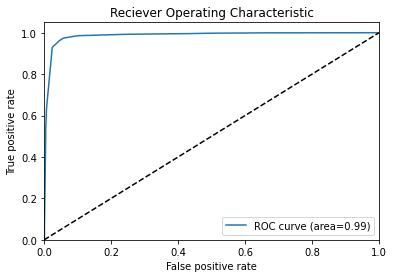

In [53]:
draw_roc(y_train_pred_df.Converted,y_train_pred_df.Prob)

## Optimal Cut-Off

In [54]:
# Now we can find the probability where sensitivity and specificity get balanced
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]=y_train_pred_df.Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_df.head()

,Converted,Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055134,3084,0,1,0,0,0,0,0,0,0,0,0
1,1,0.957533,8566,1,1,1,1,1,1,1,1,1,1,1
2,0,0.005812,5756,0,1,0,0,0,0,0,0,0,0,0
3,1,0.957533,6616,1,1,1,1,1,1,1,1,1,1,1
4,1,0.029191,2094,0,1,0,0,0,0,0,0,0,0,0


In [55]:
# Calculating various metrics for various probability cut-offs
cut_off_df=pd.DataFrame(columns=['Prob','accuracy','sensi','speci'])

num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm=metrics.confusion_matrix(y_train_pred_df.Converted,y_train_pred_df[i])
    total=sum(sum(cm))
    accuracy=round((cm[0,0]+cm[1,1])/total,4)
    sensi=round(cm[1,1]/(cm[1,1]+cm[1,0]),4)
    speci=round(cm[0,0]/(cm[0,0]+cm[0,1]),4)
    cut_off_df.loc[i]=[i,accuracy,sensi,speci]
cut_off_df

,Prob,accuracy,sensi,speci
0.0,0.0,0.5578,1.0000,0.0000
0.1,0.1,0.9462,0.9858,0.8962
0.2,0.2,0.9600,0.9739,0.9425
0.3,0.3,0.9600,0.9739,0.9425
0.4,0.4,0.9584,0.9603,0.9559
0.5,0.5,0.9577,0.9586,0.9567
0.6,0.6,0.9577,0.9586,0.9567
0.7,0.7,0.9577,0.9586,0.9567
0.8,0.8,0.9498,0.9290,0.9761
0.9,0.9,0.9482,0.9260,0.9761


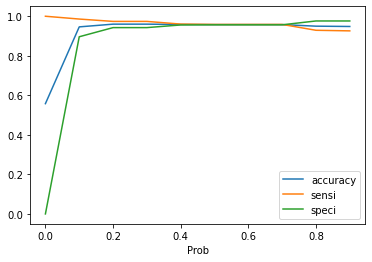

In [56]:
# Plotting a curve for accuracy, sensitivity and specificity
cut_off_df.plot.line(x='Prob',y=['accuracy','sensi','speci'])
plt.show()

- As is clear from the above curve, any value between 0.4 and 0.6 is ideal to consider

In [57]:
# Considering 0.5 as the cut off probability 
y_train_pred_df['final_predicted']=y_train_pred_df.Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_df

,Converted,Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.055134,3084,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.957533,8566,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.005812,5756,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.957533,6616,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.029191,2094,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,1,0.990805,8904,1,1,1,1,1,1,1,1,1,1,1,1
3024,1,0.990805,4296,1,1,1,1,1,1,1,1,1,1,1,1
3025,1,0.957533,851,1,1,1,1,1,1,1,1,1,1,1,1
3026,1,0.957533,174,1,1,1,1,1,1,1,1,1,1,1,1


In [58]:
# Again checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_df.Converted,y_train_pred_df['final_predicted']))

#Getting the confusion matrix also
confusion2=metrics.confusion_matrix(y_train_pred_df.Converted,y_train_pred_df['final_predicted'])
confusion2

0.9577278731836195


array([[1281,   58],
       [  70, 1619]], dtype=int64)

In [59]:
TP=confusion2[1,1]
FP=confusion2[0,1]
TN=confusion2[0,0]
FN=confusion2[1,0]

In [60]:
# Calculating sensitivity
sensitivity=round(float(TP/(TP+FN)),4)
sensitivity

0.9586

In [61]:
# specificity
specificity=round(float(TN/(TN+FP)),4)
specificity

0.9567

In [62]:
# Precision and Recall

In [63]:
round(precision_score(y_train_pred_df.Converted,y_train_pred_df['final_predicted']),4)

0.9654

In [64]:
round(recall_score(y_train_pred_df.Converted,y_train_pred_df['final_predicted']),4)

0.9586

### Precision and Recall Tradeoff

In [65]:
# Now we calculate the threshold point for precision and recall
y_train_pred_df.Converted,y_train_pred_df['final_predicted']

(0       0
 1       1
 2       0
 3       1
 4       1
        ..
 3023    1
 3024    1
 3025    1
 3026    1
 3027    0
 Name: Converted, Length: 3028, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 3023    1
 3024    1
 3025    1
 3026    1
 3027    0
 Name: final_predicted, Length: 3028, dtype: int64)

In [66]:
p,r,thresholds=precision_recall_curve(y_train_pred_df.Converted,y_train_pred_df['final_predicted'])

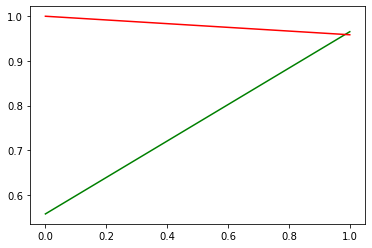

In [67]:
# Plotting the precision-recall curve
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.show()

- As expected, as the probabilities increase, recall/sensitivity can be seen declining and precision in our prediction can be seen rising

## Predictions on the test dataset

In [68]:
X_test=X_test[X_train_rfe.columns]
X_test.head()

,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Activity_SMS Sent,Lead Quality_High in Relevance,Lead Quality_Worst
5126,0,0,0,1,0,0,1,0,0
4441,0,0,0,0,0,0,0,0,1
6821,0,0,0,1,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,1
8781,0,0,0,1,0,0,0,0,0


In [69]:
# Predicting using the test dataset
y_test_pred=res7.predict(sm.add_constant(X_test))
y_test_pred

5126    0.055134
4441    0.005812
6821    0.012062
4083    0.005812
8781    0.012062
          ...   
5825    0.990805
3172    0.990805
9144    0.005812
8980    0.990805
2645    0.006252
Length: 1299, dtype: float64

In [70]:
# Converting it into a dataframe
y_pred=pd.DataFrame(y_test_pred)
y_pred

,0
5126,0.055134
4441,0.005812
6821,0.012062
4083,0.005812
8781,0.012062
...,...
5825,0.990805
3172,0.990805
9144,0.005812
8980,0.990805


In [71]:
# Merging the datsets
y_pred_final=pd.DataFrame()
y_pred_final['Converted']=y_test.values.reshape(-1)
y_pred_final['LeadID']=y_test.index
y_pred_final['Converted_prob']=y_pred.values.reshape(-1)
y_pred_final.head()

,Converted,LeadID,Converted_prob
0,0,5126,0.055134
1,0,4441,0.005812
2,0,6821,0.012062
3,0,4083,0.005812
4,0,8781,0.012062


In [72]:
# Rearranging the index
y_pred_final=y_pred_final.reindex(['LeadID','Converted','Converted_prob'],axis=1)
y_pred_final.head()

,LeadID,Converted,Converted_prob
0,5126,0,0.055134
1,4441,0,0.005812
2,6821,0,0.012062
3,4083,0,0.005812
4,8781,0,0.012062


In [73]:
# Now creating a clumn 'Predicted' as 1 if 'Converted_prob'> 0.5, else 0
y_pred_final['Predicted']=y_pred_final['Converted_prob'].map(lambda x: 1 if x> 0.5 else 0)
y_pred_final.head()

,LeadID,Converted,Converted_prob,Predicted
0,5126,0,0.055134,0
1,4441,0,0.005812,0
2,6821,0,0.012062,0
3,4083,0,0.005812,0
4,8781,0,0.012062,0


## Metrics for final prediction

In [74]:
print(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.Predicted))

0.9438029253271748


In [75]:
confusion_final=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.Predicted)
confusion_final

array([[520,  36],
       [ 37, 706]], dtype=int64)

In [76]:
TP=confusion_final[1,1]
TN=confusion_final[0,0]
FP=confusion_final[0,1]
FN=confusion_final[1,0]

In [77]:
# Now calculating sensitivity and specificity
sensitivity_test=round(float(TP/(TP+FN)),4)
sensitivity_test

0.9502

In [78]:
# Specificity
specificity_test=round(float(TN/(TN+FP)),4)
specificity_test

0.9353

- On comparing the metrics of the model for both the train and test dataset:

    1) Accuracy for train dataset is (0.9577) and for test dataset is (0.9438).
    
    2) Sensitivity for train dataset is (0.9586) and for test dataset is (0.9502).
    
    3) Specificity for train dataset is (0.9567) and for test dataset is (0.9353).
    
    Clearly all the metrics have more or less remained the same for the test dataset, implying that the logistic model fitted to the train dataset could successfully generalise over the test dataset and the predictions so made can be utilised to categorise the dataset into the ones which will be converted into paying customers.

## Hot Leads
The leads that can be tagged as the hot ones-the ones highly likely to become paid customers are as follows:

In [82]:
hot_leads=y_pred_final
hot_leads['Lead_score']=round(100*y_pred_final['Converted_prob'],2)
hot_leads=y_pred_final.sort_values('Converted_prob',0,False)
hot_leads.head(20)

,LeadID,Converted,Converted_prob,Predicted,Lead_score
695,4777,1,0.999312,1,99.93
348,1568,1,0.999312,1,99.93
313,2273,1,0.999312,1,99.93
831,2762,1,0.999312,1,99.93
103,8080,1,0.999312,1,99.93
196,4284,1,0.999312,1,99.93
667,6413,0,0.997604,1,99.76
649,7289,1,0.997348,1,99.73
629,6984,1,0.997348,1,99.73
929,1747,1,0.997348,1,99.73


- LeadIDs  '4777' , '1568' , '2273' , '2762' , '8080'  are some of the top leads probable to take up the online courses provided by 'X Education'. Moreover, above are the top 20 leads that can be tagged as potential ones and hence can be contacted by the sales team in order to maximise the outcome and minimise the time consumption.